Considere uma cadeia circular (primeira massa conectada a última) composta por N átomos conectados por molas idênticas de constante elástica k . O sistema pode ser de dois tipos:

• Cadeia Ternária: As massas alternam entre m e m2=3m e m3=5m  ao longo da cadeia.

• Cadeia Homogênea: Todas as massas são iguais a m .
Ambos os sistemas devem ser analisados sob condições de contorno com pontas livres (as extremidades da cadeia não estão presas).

In [15]:
#Biblioteca
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

Parâmetros
• Massas: m= 1kg , 
• Constante elástica:  k = 1N/m
• Tamanhos da cadeia: N = 100, 1000 e 10.000

In [16]:
m = 1
k = 1
N1 = 100
N2 = 1000
N3 = 10000

1. Cálculo das Frequências de Vibração

Para cada valor de N , calcule as frequências naturais de vibração para:

• Cadeia circular ternária(alternância  --m--m2--m3--m--m2--m3-- )

• Cadeia homogênea (todas as massas iguais) com pontas livres

In [17]:
## cadeia ternaria
# [m] --- k --- [m2] --- k --- [m3] em uma cadeia circular m se conecta com m3
## m e m2=3m e m3=5m
m = 1
m2 = 3*m
m3 = 5*m

## N tamanho da cadeira
N = 100

## cadeia homegenea
## todos os m são iguais
massas = [m]*N

In [18]:
##funcoes das construcao das cadeias que analisa se é ternaria ou homogenea
##calculo das frequencias

def detectar_tipo_massa(massas):
    massas = np.array(massas)
    if np.all(massas == massas[0]):
        return "homogenea"
    padrao = massas[:3]
    if len(massas) >= 6 and np.all(massas[::3] == padrao[0]) and \
       np.all(massas[1::3] == padrao[1]) and np.all(massas[2::3] == padrao[2]):
        return "ternaria"
    return "desconhecida"

## com o uso da Scipy criamos uma matriz esparsa diagonal das massas
def construir_M_esparsa(massas):
    return diags(massas, 0, format='csr')

## matriz esparsa de rigidez
## respeitando se a cadeira é circular ou com pontas soltas
def construir_K_esparsa(N, k, circular=False):
    diagonais = [[-k]*(N-1), [2*k]*N, [-k]*(N-1)]
    K = diags(diagonais, [-1, 0, 1], shape=(N, N), format='lil')
    if circular:
        K[0, N-1] = -k
        K[N-1, 0] = -k
    else:
        K[0, 0] = k
        K[N-1, N-1] = k
    return K.tocsr()

# resolvendo o problema de autovalores de forma generalizado, obtendo os modos vibracionais
def resolver_esparsa(K, M, n_modos=6):
    n_modos = min(n_modos, K.shape[0]-2)
    vals, vecs = eigsh(K, M=M, k=n_modos)
    freq = np.sqrt(np.abs(vals))
    return freq, vecs

# necessario para preparar massas ternárias em um vetor
def gerar_massa_ternaria(N, m1=1.0, m2=2.0, m3=3.0):
    base = np.array([m1, m2, m3])
    massas = np.tile(base, N//3)
    resto = N % 3
    if resto > 0:
        massas = np.append(massas, base[:resto])
    return massas


2. Densidade de Estados
• Construa histogramas (densidade de estados) para os valores das frequências em cada caso.
• Compare os histogramas entre a cadeia binária e a homogênea, para cada tamanho de N .

In [19]:
## geração dos histogramas de densidade de estados
def plotar_densidade_de_estados(freq_hom, freq_tern, N, bins=50):
    plt.figure(figsize=(8,5))
    plt.hist(freq_hom, bins=bins, density=True, alpha=0.6, label='Homogênea')
    plt.hist(freq_tern, bins=bins, density=True, alpha=0.6, label='Ternária')
    plt.title(f'Densidade de Estados (DOS) das Frequências - N = {N}')
    plt.xlabel('Frequência natural [rad/s]')
    plt.ylabel('Densidade Normalizada')
    plt.legend()
    plt.grid(True)
    plt.show()


3. Deslocamentos Relativos (Modos Normais)

• Para cada cadeia, obtenha os vetores de deslocamento (modos normais) correspondentes:

• Às cinco menores frequências (modos de baixa energia)

• Às cinco maiores frequências (modos de alta energia)

• Apresente gráficos dos deslocamentos relativos dos átomos para esses modos.

In [20]:
### visualizar os modos normais
def plotar_modos_normais(freq, vecs, N, titulo_prefixo='', n_bins=5):
    x = np.arange(N)
    n_modos = min(5, len(freq))

    # modos de menor frequência
    plt.figure(figsize=(12, 8))
    for i in range(n_modos):
        plt.subplot(n_modos, 1, i+1)
        plt.plot(x, vecs[:, i], marker='o')
        plt.title(f'{titulo_prefixo} Modo {i+1} - Frequência {freq[i]:.4f} rad/s (Menor)')
        plt.ylabel('Deslocamento')
        plt.grid(True)
    plt.xlabel('Posição do nó')
    plt.tight_layout()
    plt.show()

    # modos de maior frequência
    indices_maiores = np.argsort(freq)[-n_modos:]
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(indices_maiores):
        plt.subplot(n_modos, 1, i+1)
        plt.plot(x, vecs[:, idx], marker='o')
        plt.title(f'{titulo_prefixo} Modo {idx+1} - Frequência {freq[idx]:.4f} rad/s (Maior)')
        plt.ylabel('Deslocamento')
        plt.grid(True)
    plt.xlabel('Posição do nó')
    plt.tight_layout()
    plt.show()

4. Análise e Comparação

Analise como a alternância de massas (ternária) e a homogeneidade afetam:

• A distribuição das frequências (densidade de estados)

• Os padrões de deslocamento dos modos normais

• Discuta a presença de possíveis lacunas de frequência (band gaps) e a localização dos modos.


==== Cadeia para N = 100 ====



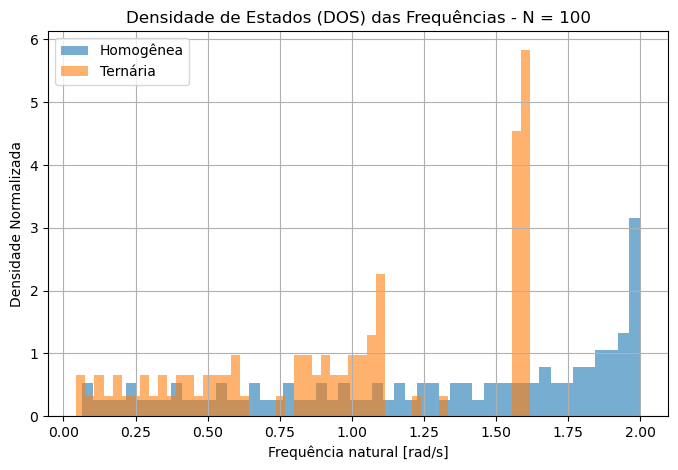

Modos Normais - Cadeia Homogênea N=100


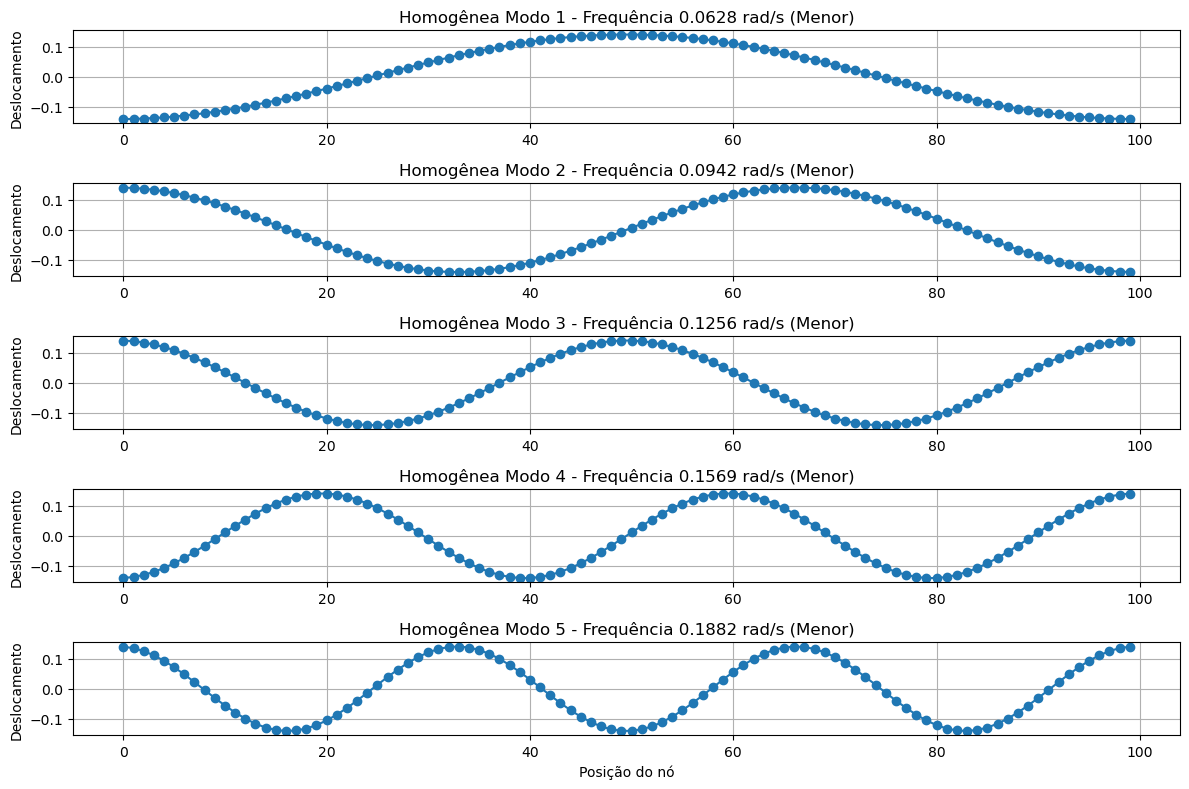

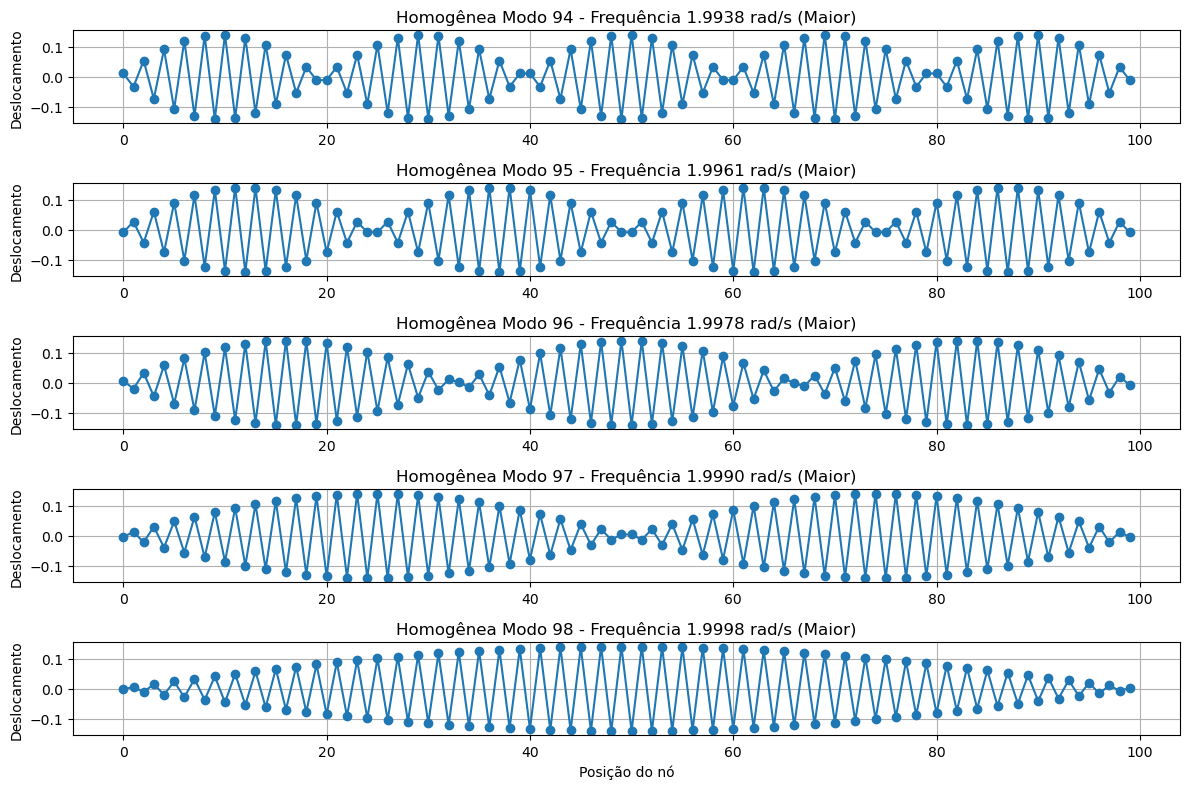

| Modos Normais - Cadeia Ternária N=100


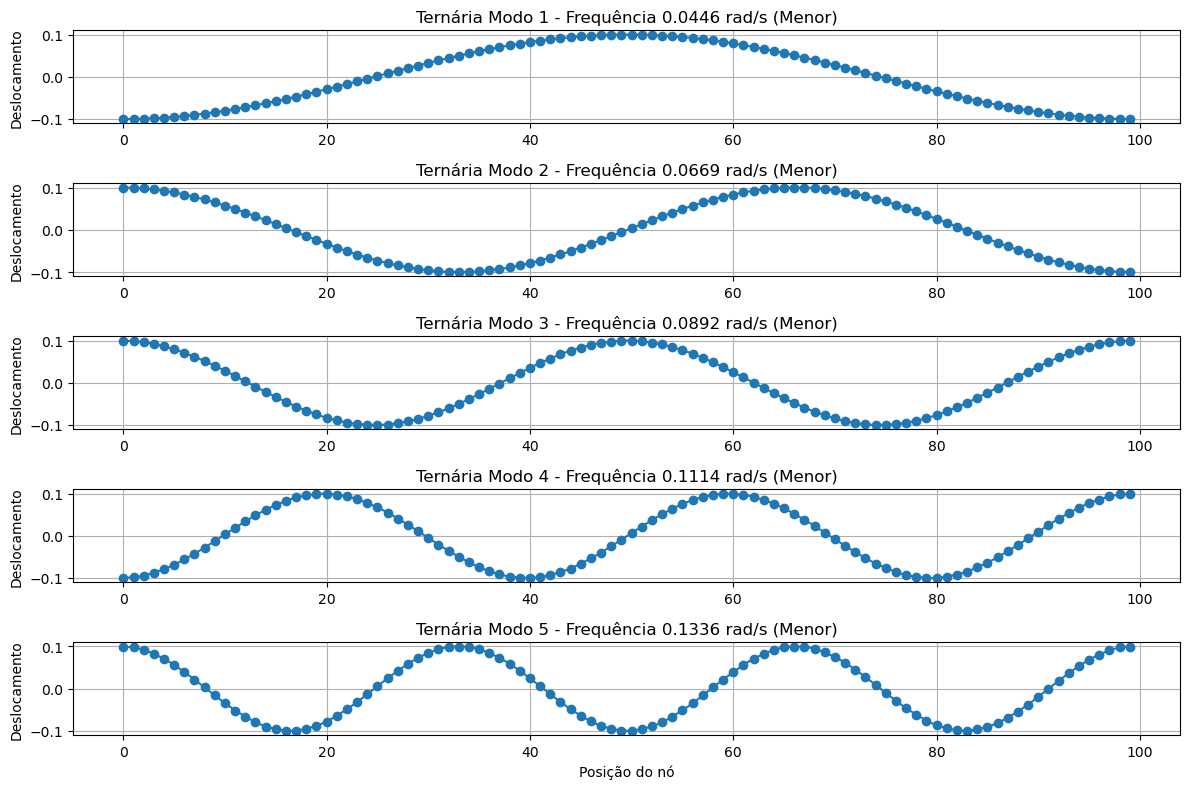

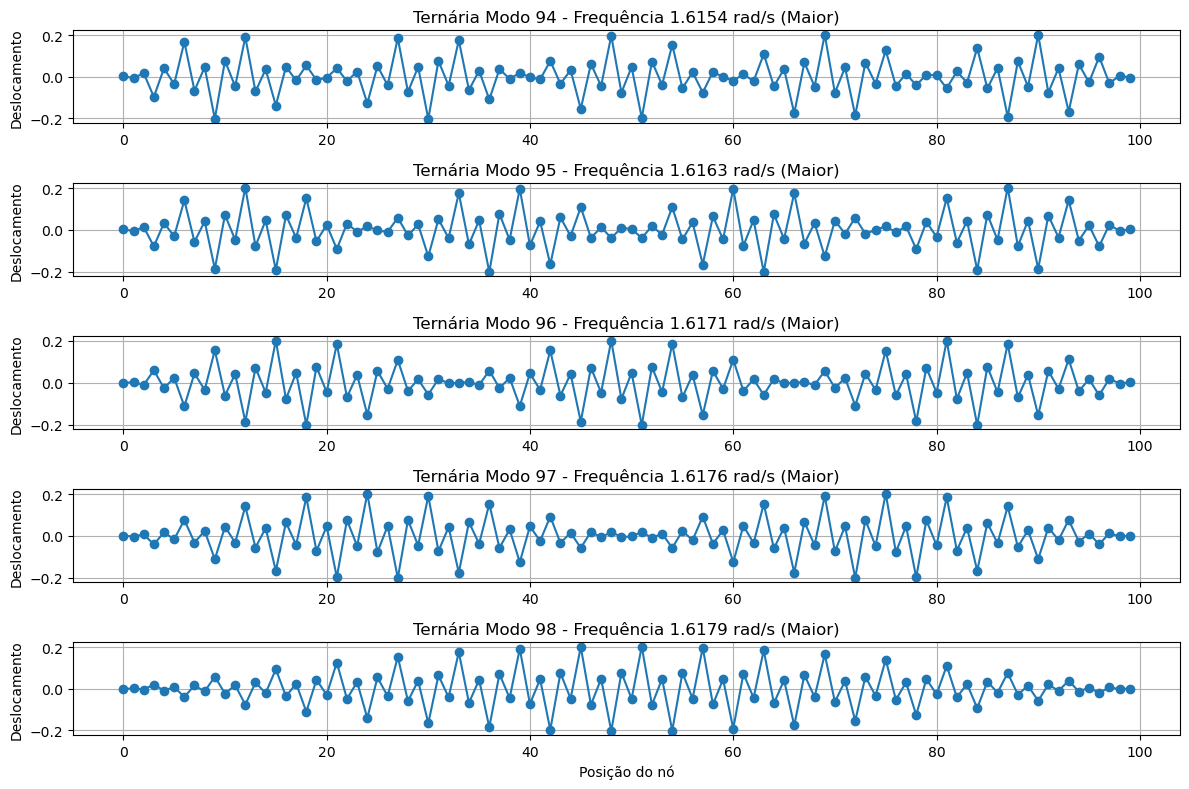


==== Cadeia para N = 1000 ====



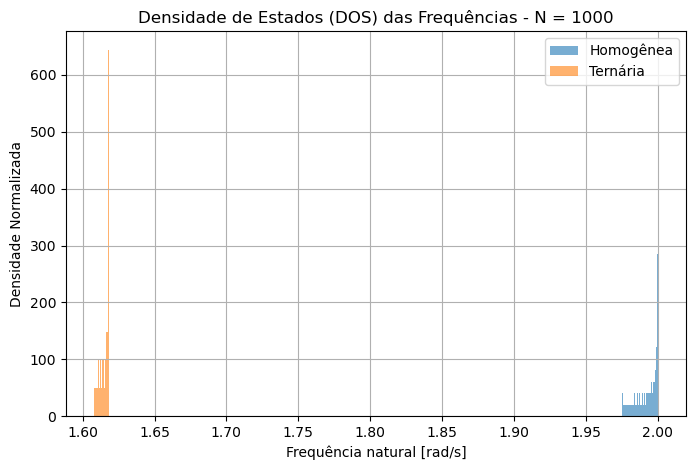

Modos Normais - Cadeia Homogênea N=1000


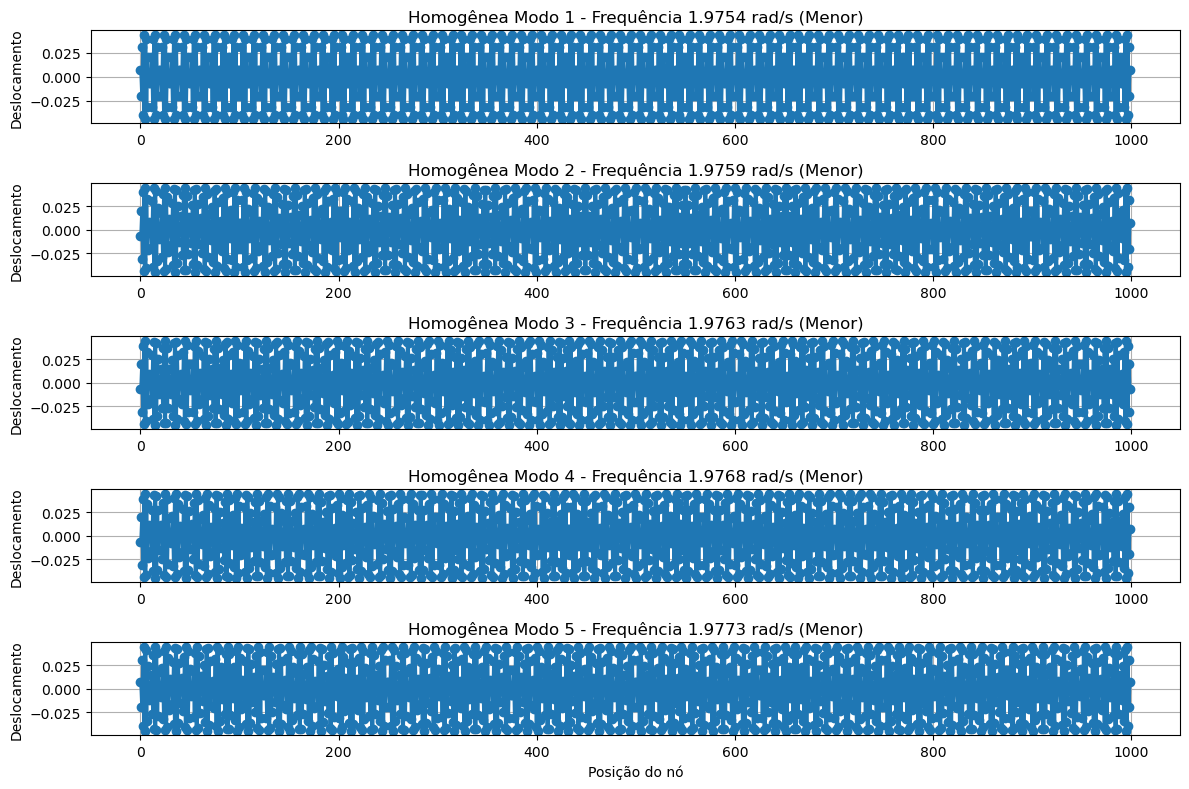

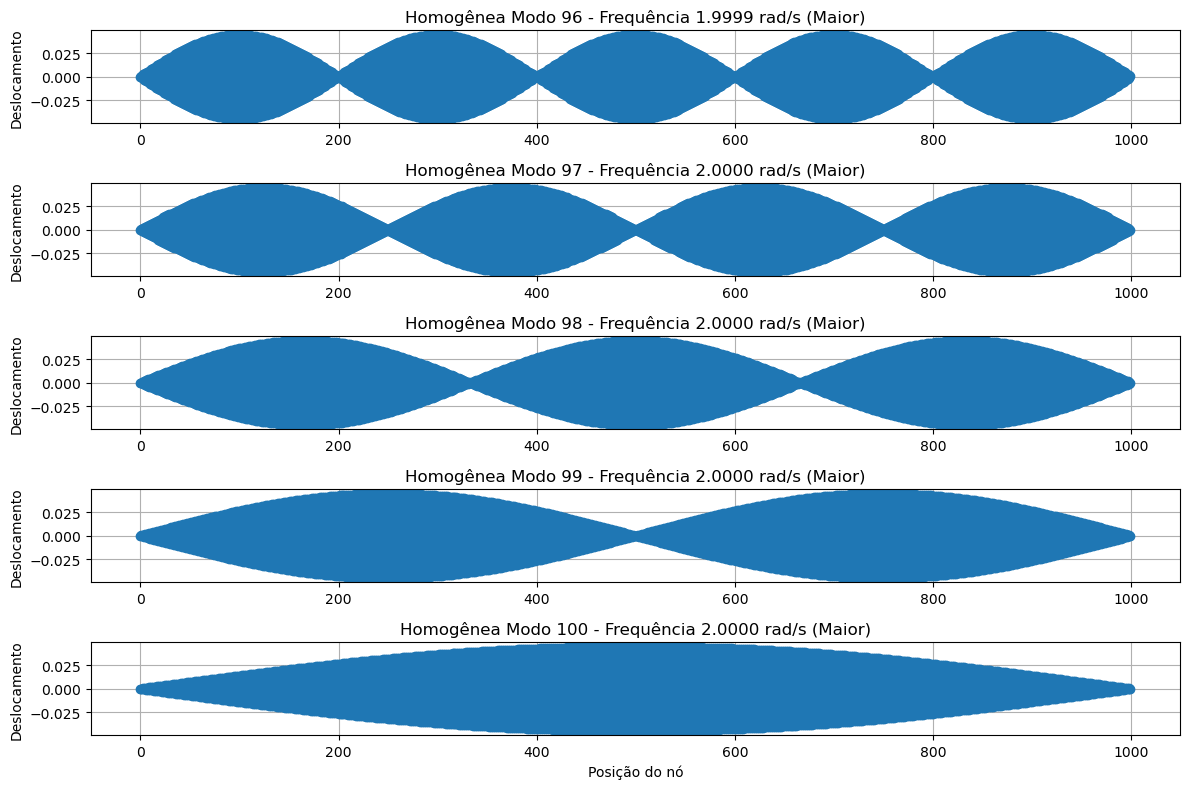

| Modos Normais - Cadeia Ternária N=1000


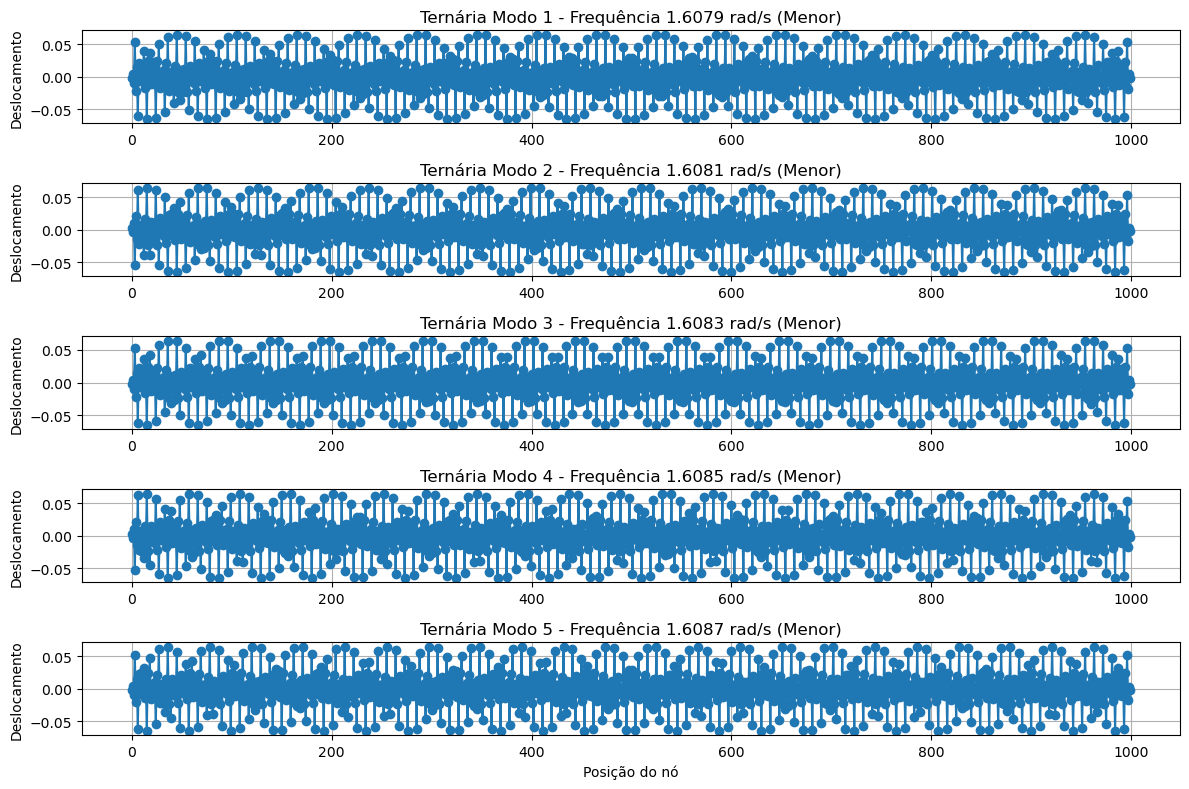

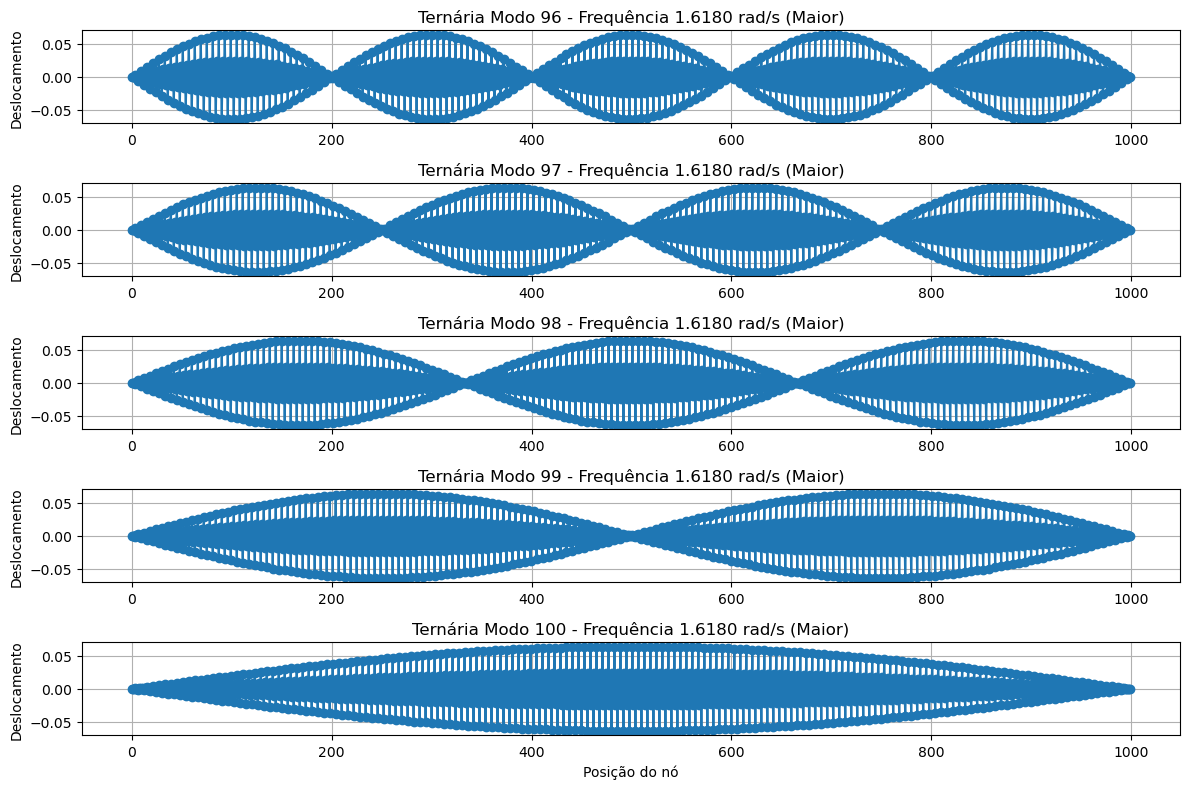


==== Cadeia para N = 10000 ====



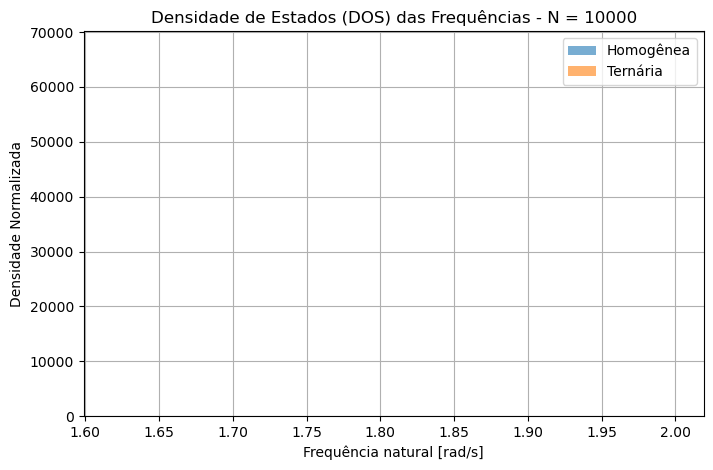

Modos Normais - Cadeia Homogênea N=10000


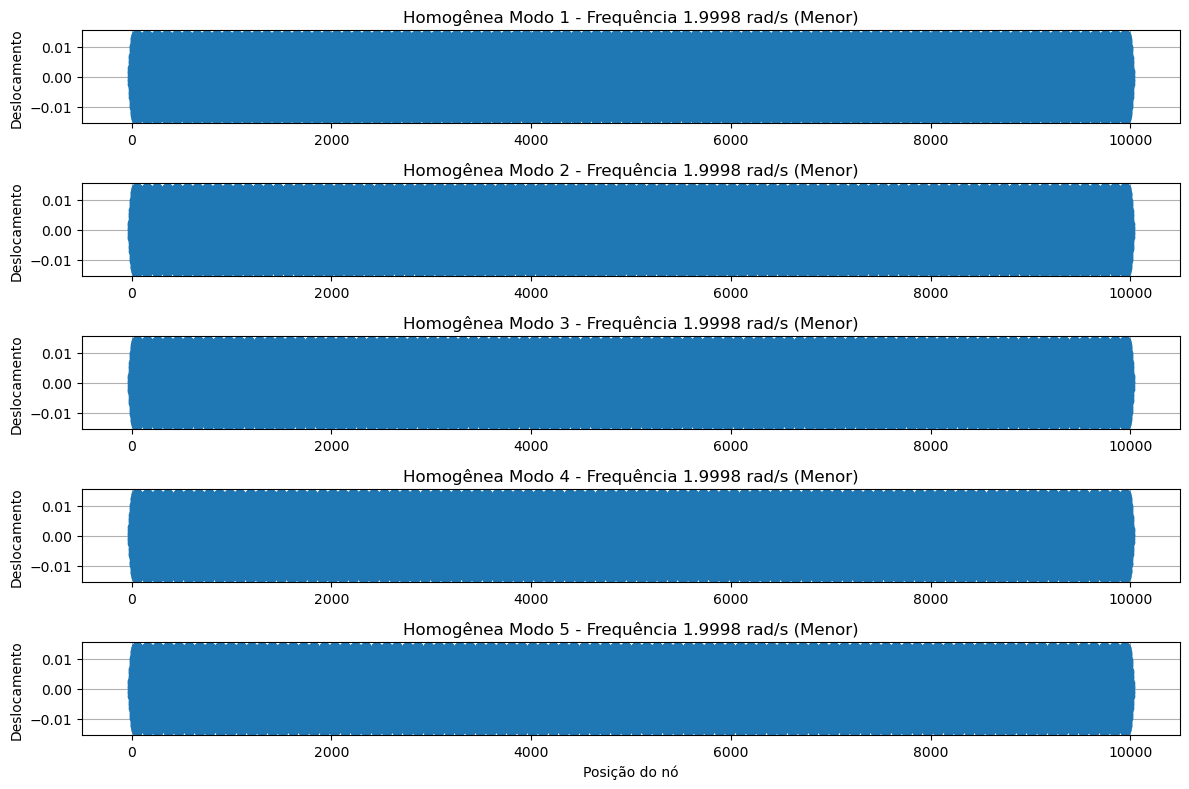

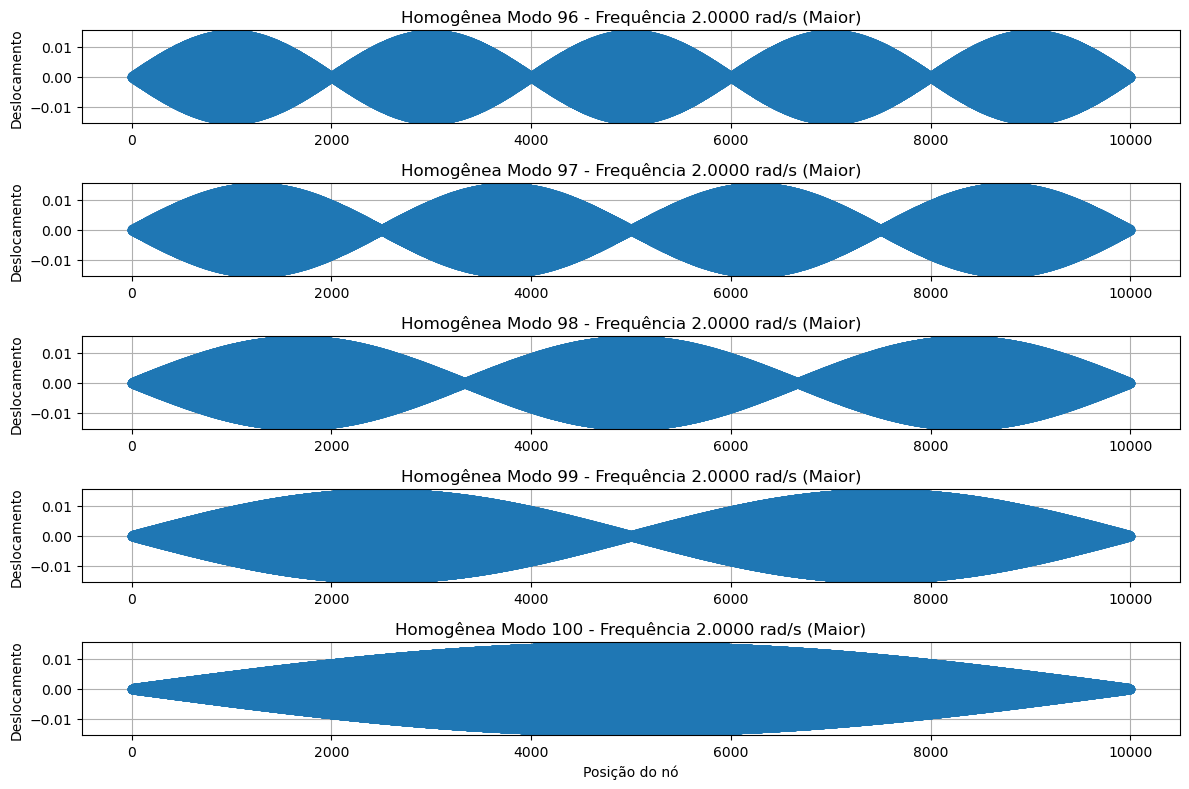

| Modos Normais - Cadeia Ternária N=10000


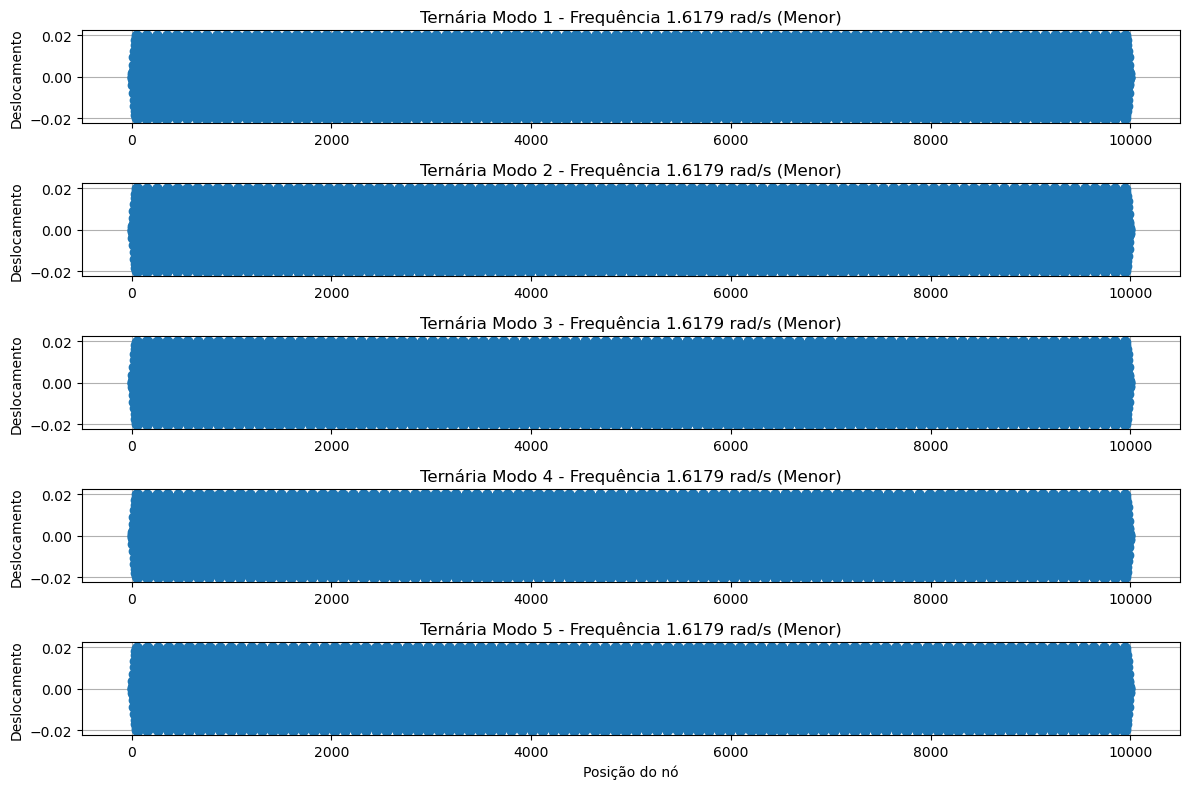

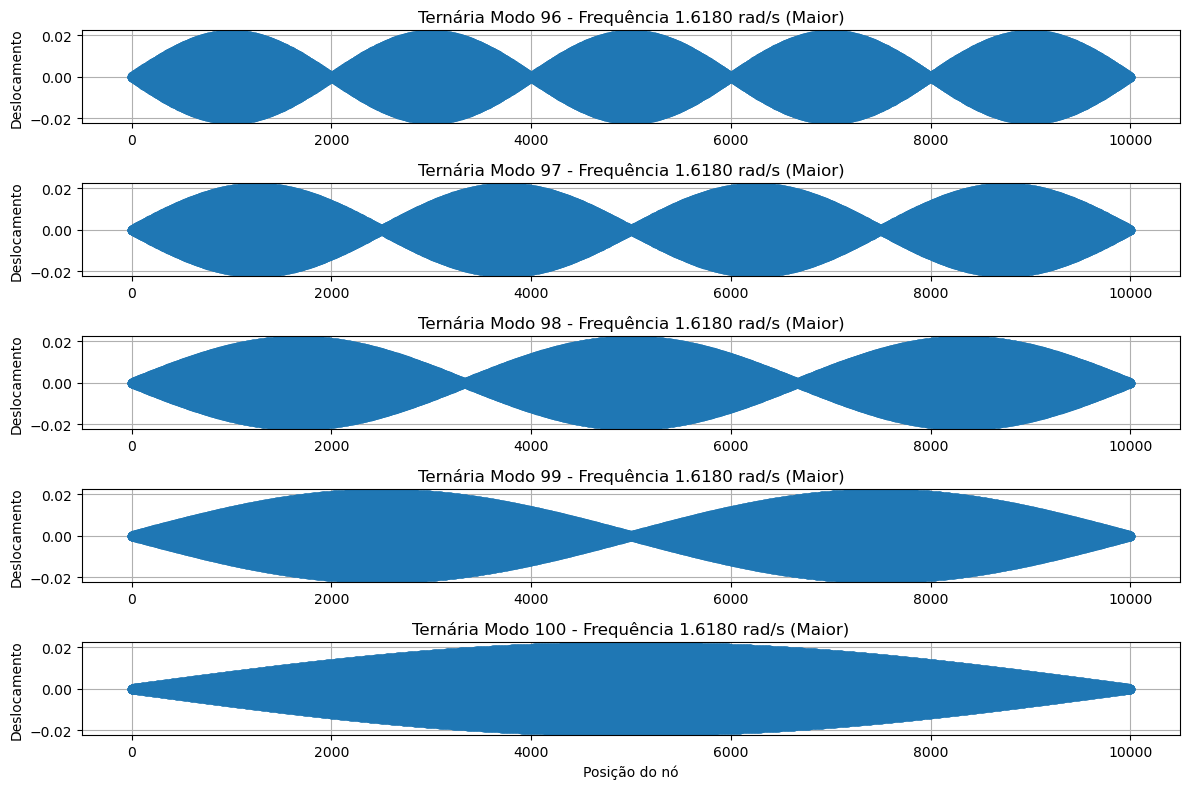

In [21]:
k = 1.0
tamanhos = [100, 1000, 10000]

for N in tamanhos:
    print(f'\n==== Cadeia para N = {N} ====\n')

    # Homogênea
    massas_hom = np.ones(N)
    M_hom = construir_M_esparsa(massas_hom)
    K_hom = construir_K_esparsa(N, k, circular=False)
    freq_hom, modos_hom = resolver_esparsa(K_hom, M_hom, n_modos=min(100, N-2))

    # Ternária
    massas_tern = gerar_massa_ternaria(N)
    M_tern = construir_M_esparsa(massas_tern)
    K_tern = construir_K_esparsa(N, k, circular=False)
    freq_tern, modos_tern = resolver_esparsa(K_tern, M_tern, n_modos=min(100, N-2))

    # Plotar densidade de estados
    plotar_densidade_de_estados(freq_hom, freq_tern, N)

    # Plotar modos normais para os 5 menores e maiores modos
    print(f'Modos Normais - Cadeia Homogênea N={N}')
    plotar_modos_normais(freq_hom, modos_hom, N, titulo_prefixo='Homogênea', n_bins= 5)

    print(f'| Modos Normais - Cadeia Ternária N={N}')
    plotar_modos_normais(freq_tern, modos_tern, N, titulo_prefixo='Ternária', n_bins=5)


A cadeia homogênea apresenta uma distribuição contínua e suave das frequências naturais, refletindo um sistema uniforme sem restrições à propagação das ondas vibracionais. Por outro lado, a cadeia ternária, devido à alternância periódica das massas, apresenta lacunas evidentes na densidade de estados, caracterizando band gaps onde não existem modos vibracionais permitidos.
Os modos normais de baixa frequência nas cadeias homogêneas são ondas suaves e estendidas, enquanto na cadeia ternária estes modos mostram padrões modulados pela periodicidade das massas. Modos de alta frequência na cadeia ternária evidenciam também a presença de modos localizados, indicativos de confinamento vibracional em regiões específicas da cadeia.
O aumento do tamanho da cadeia intensifica esses efeitos, tornando os band gaps e os modos localizados mais evidentes.